Nama: Felicia Arief Wibowo

NIM: 2602070566

In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv('data_1D.csv')
df.head()

,Unnamed: 0,text,label
0,0,Tamron AF 70-300mm F/4.0-5.6 Di LD Macro Telep...,Electronics
1,1,Softline Butterfly Women's Cotton Camisole,Clothing & Accessories
2,2,Indian Economy: For UPSC Civil Services & Othe...,Books
3,3,Fujifilm X-T3 Mirrorless Digital Camera with X...,Electronics
4,4,"Barata Formal Ties For Men, Navy Blue Tie Form...",Clothing & Accessories


In [39]:
print(f"Jumlah data: {len(df)}")

Jumlah data: 12606


In [40]:
df = df.drop_duplicates(subset=['text'])

In [41]:
print(f"Jumlah baris setelah duplikasi dihapus: {len(df)}")

Jumlah baris setelah duplikasi dihapus: 10454


### **Splitting Data**

In [42]:
from sklearn.model_selection import train_test_split
x = df['text']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Preprocessing**

Dalam proses ini, saya melakukan mengubah komentar-komentar yang sudah dikumpulkan menjadi cleantext, saya menghapus hashtag, angka, tanda baca, dan mengubah seluruh kata ke lowercase. Lalu setelah itu saya melakukan tokenization untuk membagi kata per kata, stopword juga dihapuskan dan yang terakhir stemming untuk mengubah kata menjadi bentuk dasarnya.

In [43]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer

In [45]:
#cleansing function
def cleansing(text):
    text = re.sub(r'#\w+', '', text)     # hapus hashtag
    text = re.sub(r'\d+', '', text)      # hapus angka
    text = re.sub(r'[^\w\s]', '', text)  # hapus tanda baca
    text = text.lower()                  # ubah ke huruf kecil
    return text

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))


def preprocess(text):
    text = cleansing(text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [46]:
x_train = x_train.apply(preprocess)
x_test = x_test.apply(preprocess)

In [47]:
x_train

,text
520,nta ugc netsetjrf paper teach research aptitud...
5234,green tee men colour dhoti pack brown blue gre...
4310,maniac women fleec sweatshirt step friend chil...
8354,marusthali gold silver plate brass bowl set pc...
4230,appl iphon xr white gb ram gb storag mp camera...
...,...
6371,adida women polo
5713,glenburn tea direct stainless steel glass pot ...
5961,pruthvik hispe gold plate dvid dual link male ...
876,electr engin fundament


In [48]:
x_test

,text
6855,envi ecr xaa mah batteri charger recharg batte...
5813,surviv guid life
3391,askyl x zoom land sky view telescop silver tel...
3894,gener electr solder iron stand tool wire strip...
3056,curiou georg visit librari author han margret ...
...,...
11321,rolltop comput intel core duo ghz processor ra...
8624,quantum doctor quantum physicist explain heal ...
623,larwa men polyest dupion lace embroid dhoti db...
11712,rt extern hd inch usb power floppydisk drive p...


# **Modelling**

## **Vectorizer: TF-IDF**

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [50]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)
y = df['label']

### **SVM**

In [51]:
svm_model = SVC()
svm_model.fit(x_train_tfidf, y_train)
prediction_svm_tfidf = svm_model.predict(x_test_tfidf)

In [52]:
accuracy_svm_tfidf = accuracy_score(y_test, prediction_svm_tfidf)
precision_svm_tfidf = precision_score(y_test, prediction_svm_tfidf, average='weighted')
recall_svm_tfidf = recall_score(y_test, prediction_svm_tfidf, average='weighted')
f1_svm_tfidf = f1_score(y_test, prediction_svm_tfidf, average='weighted')

print("Model Evaluation SVM with TF-IDF")
print(f"Accuracy: {accuracy_svm_tfidf:.4f}")
print(f"Precision: {precision_svm_tfidf:.4f}")
print(f"Recall: {recall_svm_tfidf:.4f}")
print(f"F1 Score: {f1_svm_tfidf:.4f}")

Model Evaluation SVM with TF-IDF
Accuracy: 0.9546
Precision: 0.9549
Recall: 0.9546
F1 Score: 0.9545


In [53]:
print("Classification Report SVM dengan TF-IDF:\n", classification_report(y_test, prediction_svm_tfidf))

Classification Report SVM dengan TF-IDF:
                         precision    recall  f1-score   support

                 Books       0.96      0.94      0.95       488
Clothing & Accessories       0.98      0.96      0.97       389
           Electronics       0.95      0.93      0.94       391
             Household       0.94      0.97      0.96       823

              accuracy                           0.95      2091
             macro avg       0.96      0.95      0.95      2091
          weighted avg       0.95      0.95      0.95      2091



### **Random Forest**

In [54]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_tfidf, y_train)
prediction_rf_tfidf = rf_model.predict(x_test_tfidf)

In [55]:
accuracy_rf_tfidf = accuracy_score(y_test, prediction_rf_tfidf)
precision_rf_tfidf = precision_score(y_test, prediction_rf_tfidf, average='weighted')
recall_rf_tfidf = recall_score(y_test, prediction_rf_tfidf, average='weighted')
f1_rf_tfidf = f1_score(y_test, prediction_rf_tfidf, average='weighted')

print("Model Evaluation Random Forest with TF-IDF")
print(f"Accuracy: {accuracy_rf_tfidf:.4f}")
print(f"Precision: {precision_rf_tfidf:.4f}")
print(f"Recall: {recall_rf_tfidf:.4f}")
print(f"F1 Score: {f1_rf_tfidf:.4f}")

Model Evaluation Random Forest with TF-IDF
Accuracy: 0.9230
Precision: 0.9241
Recall: 0.9230
F1 Score: 0.9228


In [56]:
print("Classification Report Random Forest dengan TF-IDF:\n", classification_report(y_test, prediction_rf_tfidf))

Classification Report Random Forest dengan TF-IDF:
                         precision    recall  f1-score   support

                 Books       0.93      0.93      0.93       488
Clothing & Accessories       0.95      0.93      0.94       389
           Electronics       0.95      0.85      0.90       391
             Household       0.90      0.95      0.92       823

              accuracy                           0.92      2091
             macro avg       0.93      0.92      0.92      2091
          weighted avg       0.92      0.92      0.92      2091



### **Tuned SVM**

In [57]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model_tfidf_tuned = GridSearchCV(SVC(), param_grid_svm, cv=5)
svm_model_tfidf_tuned.fit(x_train_tfidf, y_train)

svm_predictions_tfidf_tuned = svm_model_tfidf_tuned.predict(x_test_tfidf)

svm_tfidf_best_params = svm_model_tfidf_tuned.best_params_
print(f"Best Parameters: {svm_tfidf_best_params}")

svm_tfidf_best_estimator = svm_model_tfidf_tuned.best_estimator_
print(f"Best Estimator: {svm_tfidf_best_estimator}")

Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Estimator: SVC(C=1, kernel='linear')


In [58]:
accuracy_tuned_svm_tfidf = accuracy_score(y_test, svm_predictions_tfidf_tuned)
precision_tuned_svm_tfidf = precision_score(y_test, svm_predictions_tfidf_tuned, average='weighted')
recall_tuned_svm_tfidf = recall_score(y_test, svm_predictions_tfidf_tuned, average='weighted')
f1_svm_tuned_tfidf = f1_score(y_test, svm_predictions_tfidf_tuned, average='weighted')

print("Model Evaluation Tuned SVM with TF-IDF")
print(f"Accuracy: {accuracy_tuned_svm_tfidf:.4f}")
print(f"Precision: {precision_tuned_svm_tfidf:.4f}")
print(f"Recall: {recall_tuned_svm_tfidf:.4f}")
print(f"F1 Score: {f1_svm_tuned_tfidf:.4f}")

Model Evaluation Tuned SVM with TF-IDF
Accuracy: 0.9584
Precision: 0.9585
Recall: 0.9584
F1 Score: 0.9584


In [59]:
print("Classification Report Tuned SVM dengan TF-IDF:\n", classification_report(y_test, svm_predictions_tfidf_tuned))

Classification Report Tuned SVM dengan TF-IDF:
                         precision    recall  f1-score   support

                 Books       0.96      0.95      0.96       488
Clothing & Accessories       0.97      0.96      0.97       389
           Electronics       0.94      0.95      0.95       391
             Household       0.95      0.97      0.96       823

              accuracy                           0.96      2091
             macro avg       0.96      0.96      0.96      2091
          weighted avg       0.96      0.96      0.96      2091



### **Tuned Random Forest**

In [60]:
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [10, 20, 30, None],
                 'bootstrap': [True, False]}
rf_model_tfidf_tuned = GridSearchCV(RandomForestClassifier(), param_grid = param_grid_rf, cv=3, n_jobs = -1, verbose = 2, scoring = 'accuracy')
rf_model_tfidf_tuned.fit(x_train_tfidf, y_train)

rf_tfidf_best_params = rf_model_tfidf_tuned.best_params_
print(f"Best Parameters: {rf_tfidf_best_params}")

rf_tfidf_best_estimator = rf_model_tfidf_tuned.best_estimator_
print(f"Best Estimator: {rf_tfidf_best_estimator}")


prediction_rf_tfidf_tuned = rf_model_tfidf_tuned.predict(x_test_tfidf)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(bootstrap=False, n_estimators=200)


In [61]:
accuracy_tuned_rf_tfidf = accuracy_score(y_test, prediction_rf_tfidf_tuned)
precision_tuned_rf_tfidf = precision_score(y_test, prediction_rf_tfidf_tuned, average='weighted')
recall_tuned_rf_tfidf = recall_score(y_test, prediction_rf_tfidf_tuned, average='weighted')
f1_rf_tuned_tfidf = f1_score(y_test, prediction_rf_tfidf_tuned, average='weighted')

print("Model Evaluation Tuned Random Forest with TF-IDF")
print(f"Accuracy: {accuracy_tuned_rf_tfidf:.4f}")
print(f"Precision: {precision_tuned_rf_tfidf:.4f}")
print(f"Recall: {recall_tuned_rf_tfidf:.4f}")
print(f"F1 Score: {f1_rf_tuned_tfidf:.4f}")

Model Evaluation Tuned Random Forest with TF-IDF
Accuracy: 0.9311
Precision: 0.9324
Recall: 0.9311
F1 Score: 0.9311


In [62]:
print("Classification Report Tuned Random Forest dengan TF-IDF:\n", classification_report(y_test, prediction_rf_tfidf_tuned))

Classification Report Tuned Random Forest dengan TF-IDF:
                         precision    recall  f1-score   support

                 Books       0.95      0.93      0.94       488
Clothing & Accessories       0.96      0.93      0.95       389
           Electronics       0.94      0.87      0.91       391
             Household       0.90      0.96      0.93       823

              accuracy                           0.93      2091
             macro avg       0.94      0.92      0.93      2091
          weighted avg       0.93      0.93      0.93      2091



## **Vectorizer: CountVectorizer**

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
cvectorizer = CountVectorizer()
x_train_cv = cvectorizer.fit_transform(x_train)
x_test_cv = cvectorizer.transform(x_test)
y = df['label']

### **SVM**

In [65]:
svm_model = SVC()
svm_model.fit(x_train_cv, y_train)
prediction_svm_cv = svm_model.predict(x_test_cv)

In [66]:
accuracy_svm_cv = accuracy_score(y_test, prediction_svm_cv)
precision_svm_cv = precision_score(y_test, prediction_svm_cv, average='weighted')
recall_svm_cv = recall_score(y_test, prediction_svm_cv, average='weighted')
f1_svm_cv = f1_score(y_test, prediction_svm_cv, average='weighted')

print("Model Evaluation SVM with CountVectorizer")
print(f"Accuracy: {accuracy_svm_cv:.4f}")
print(f"Precision: {precision_svm_cv:.4f}")
print(f"Recall: {recall_svm_cv:.4f}")
print(f"F1 Score: {f1_svm_cv:.4f}")

Model Evaluation SVM with CountVectorizer
Accuracy: 0.9044
Precision: 0.9076
Recall: 0.9044
F1 Score: 0.9047


In [67]:
print("SVM Classification Report SVM dengan CountVectorizer:\n", classification_report(y_test, prediction_svm_cv))

SVM Classification Report SVM dengan CountVectorizer:
                         precision    recall  f1-score   support

                 Books       0.83      0.93      0.88       488
Clothing & Accessories       0.96      0.86      0.91       389
           Electronics       0.94      0.87      0.90       391
             Household       0.91      0.92      0.92       823

              accuracy                           0.90      2091
             macro avg       0.91      0.90      0.90      2091
          weighted avg       0.91      0.90      0.90      2091



### **Random Forest**

In [68]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_cv, y_train)
prediction_rf_cv = rf_model.predict(x_test_cv)

In [69]:
accuracy_rf_cv = accuracy_score(y_test, prediction_rf_cv)
precision_rf_cv = precision_score(y_test, prediction_rf_cv, average='weighted')
recall_rf_cv = recall_score(y_test, prediction_rf_cv, average='weighted')
f1_rf_cv = f1_score(y_test, prediction_rf_cv, average='weighted')

print("Model Evaluation Random Forest with CountVectorizer")
print(f"Accuracy: {accuracy_rf_cv:.4f}")
print(f"Precision: {precision_rf_cv:.4f}")
print(f"Recall: {recall_rf_cv:.4f}")
print(f"F1 Score: {f1_rf_cv:.4f}")

Model Evaluation Random Forest with CountVectorizer
Accuracy: 0.9249
Precision: 0.9262
Recall: 0.9249
F1 Score: 0.9247


In [93]:
print("SVM Classification Report Random Forest dengan CountVectorizer:\n", classification_report(y_test, prediction_rf_cv))

SVM Classification Report Random Forest dengan CountVectorizer:
                         precision    recall  f1-score   support

                 Books       0.93      0.93      0.93       488
Clothing & Accessories       0.95      0.92      0.93       389
           Electronics       0.95      0.86      0.90       391
             Household       0.90      0.95      0.92       823

              accuracy                           0.92      2091
             macro avg       0.93      0.91      0.92      2091
          weighted avg       0.92      0.92      0.92      2091



### **Tuned SVM**

In [70]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model_cv_tuned = GridSearchCV(SVC(), param_grid_svm, cv=5)
svm_model_cv_tuned.fit(x_train_cv, y_train)

svm_prediction_cv_tuned = svm_model_cv_tuned.predict(x_test_cv)

svm_cv_best_params = svm_model_cv_tuned.best_params_
print(f"Best Parameters: {svm_cv_best_params}")

svm_cv_best_estimator = svm_model_cv_tuned.best_estimator_
print(f"Best Estimator: {svm_cv_best_estimator}")

Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Estimator: SVC(C=0.1, kernel='linear')


In [71]:
accuracy_tuned_svm_cv = accuracy_score(y_test, svm_prediction_cv_tuned)
precision_tuned_svm_cv = precision_score(y_test, svm_prediction_cv_tuned, average='weighted')
recall_tuned_svm_cv = recall_score(y_test, svm_prediction_cv_tuned, average='weighted')
f1_svm_tuned_cv = f1_score(y_test, svm_prediction_cv_tuned, average='weighted')

print("Model Evaluation Tuned SVM with CountVectorizer")
print(f"Accuracy: {accuracy_tuned_svm_cv:.4f}")
print(f"Precision: {precision_tuned_svm_cv:.4f}")
print(f"Recall: {recall_tuned_svm_cv:.4f}")
print(f"F1 Score: {f1_svm_tuned_cv:.4f}")

Model Evaluation Tuned SVM with CountVectorizer
Accuracy: 0.9264
Precision: 0.9268
Recall: 0.9264
F1 Score: 0.9264


In [72]:
print("Classification Report Tuned SVM dengan CountVectorizer:\n", classification_report(y_test, svm_prediction_cv_tuned))

Classification Report Tuned SVM dengan CountVectorizer:
                         precision    recall  f1-score   support

                 Books       0.89      0.94      0.92       488
Clothing & Accessories       0.95      0.94      0.94       389
           Electronics       0.92      0.89      0.91       391
             Household       0.94      0.93      0.93       823

              accuracy                           0.93      2091
             macro avg       0.93      0.92      0.92      2091
          weighted avg       0.93      0.93      0.93      2091



### **Tuned Random Forest**

In [73]:
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [10, 20, 30, None],
                 'bootstrap': [True, False]}
rf_model_cv_tuned = GridSearchCV(RandomForestClassifier(), param_grid = param_grid_rf, cv=3, n_jobs = -1, verbose = 2, scoring = 'accuracy')
rf_model_cv_tuned.fit(x_train_cv, y_train)

rf_cv_best_params = rf_model_cv_tuned.best_params_
print(f"Best Parameters: {rf_cv_best_params}")

rf_cv_best_estimator = rf_model_cv_tuned.best_estimator_
print(f"Best Estimator: {rf_cv_best_estimator}")

rf_prediction_cv_tuned = rf_model_cv_tuned.predict(x_test_cv)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(bootstrap=False)


In [74]:
accuracy_tuned_rf_cv = accuracy_score(y_test, rf_prediction_cv_tuned)
precision_tuned_rf_cv = precision_score(y_test, rf_prediction_cv_tuned, average='weighted')
recall_tuned_rf_cv = recall_score(y_test, rf_prediction_cv_tuned, average='weighted')
f1_rf_tuned_cv = f1_score(y_test, rf_prediction_cv_tuned, average='weighted')

print("Model Evaluation Tuned Random Forest with CountVectorizer")
print(f"Accuracy: {accuracy_tuned_rf_cv:.4f}")
print(f"Precision: {precision_tuned_rf_cv:.4f}")
print(f"Recall: {recall_tuned_rf_cv:.4f}")
print(f"F1 Score: {f1_rf_tuned_cv:.4f}")

Model Evaluation Tuned Random Forest with CountVectorizer
Accuracy: 0.9287
Precision: 0.9298
Recall: 0.9287
F1 Score: 0.9286


In [75]:
print("Classification Report Tuned Random Forest dengan CountVectorizer:\n", classification_report(y_test, rf_prediction_cv_tuned))

Classification Report Tuned Random Forest dengan CountVectorizer:
                         precision    recall  f1-score   support

                 Books       0.95      0.93      0.94       488
Clothing & Accessories       0.95      0.93      0.94       389
           Electronics       0.95      0.87      0.91       391
             Household       0.90      0.96      0.93       823

              accuracy                           0.93      2091
             macro avg       0.94      0.92      0.93      2091
          weighted avg       0.93      0.93      0.93      2091



### **Table Perbandingan Model**

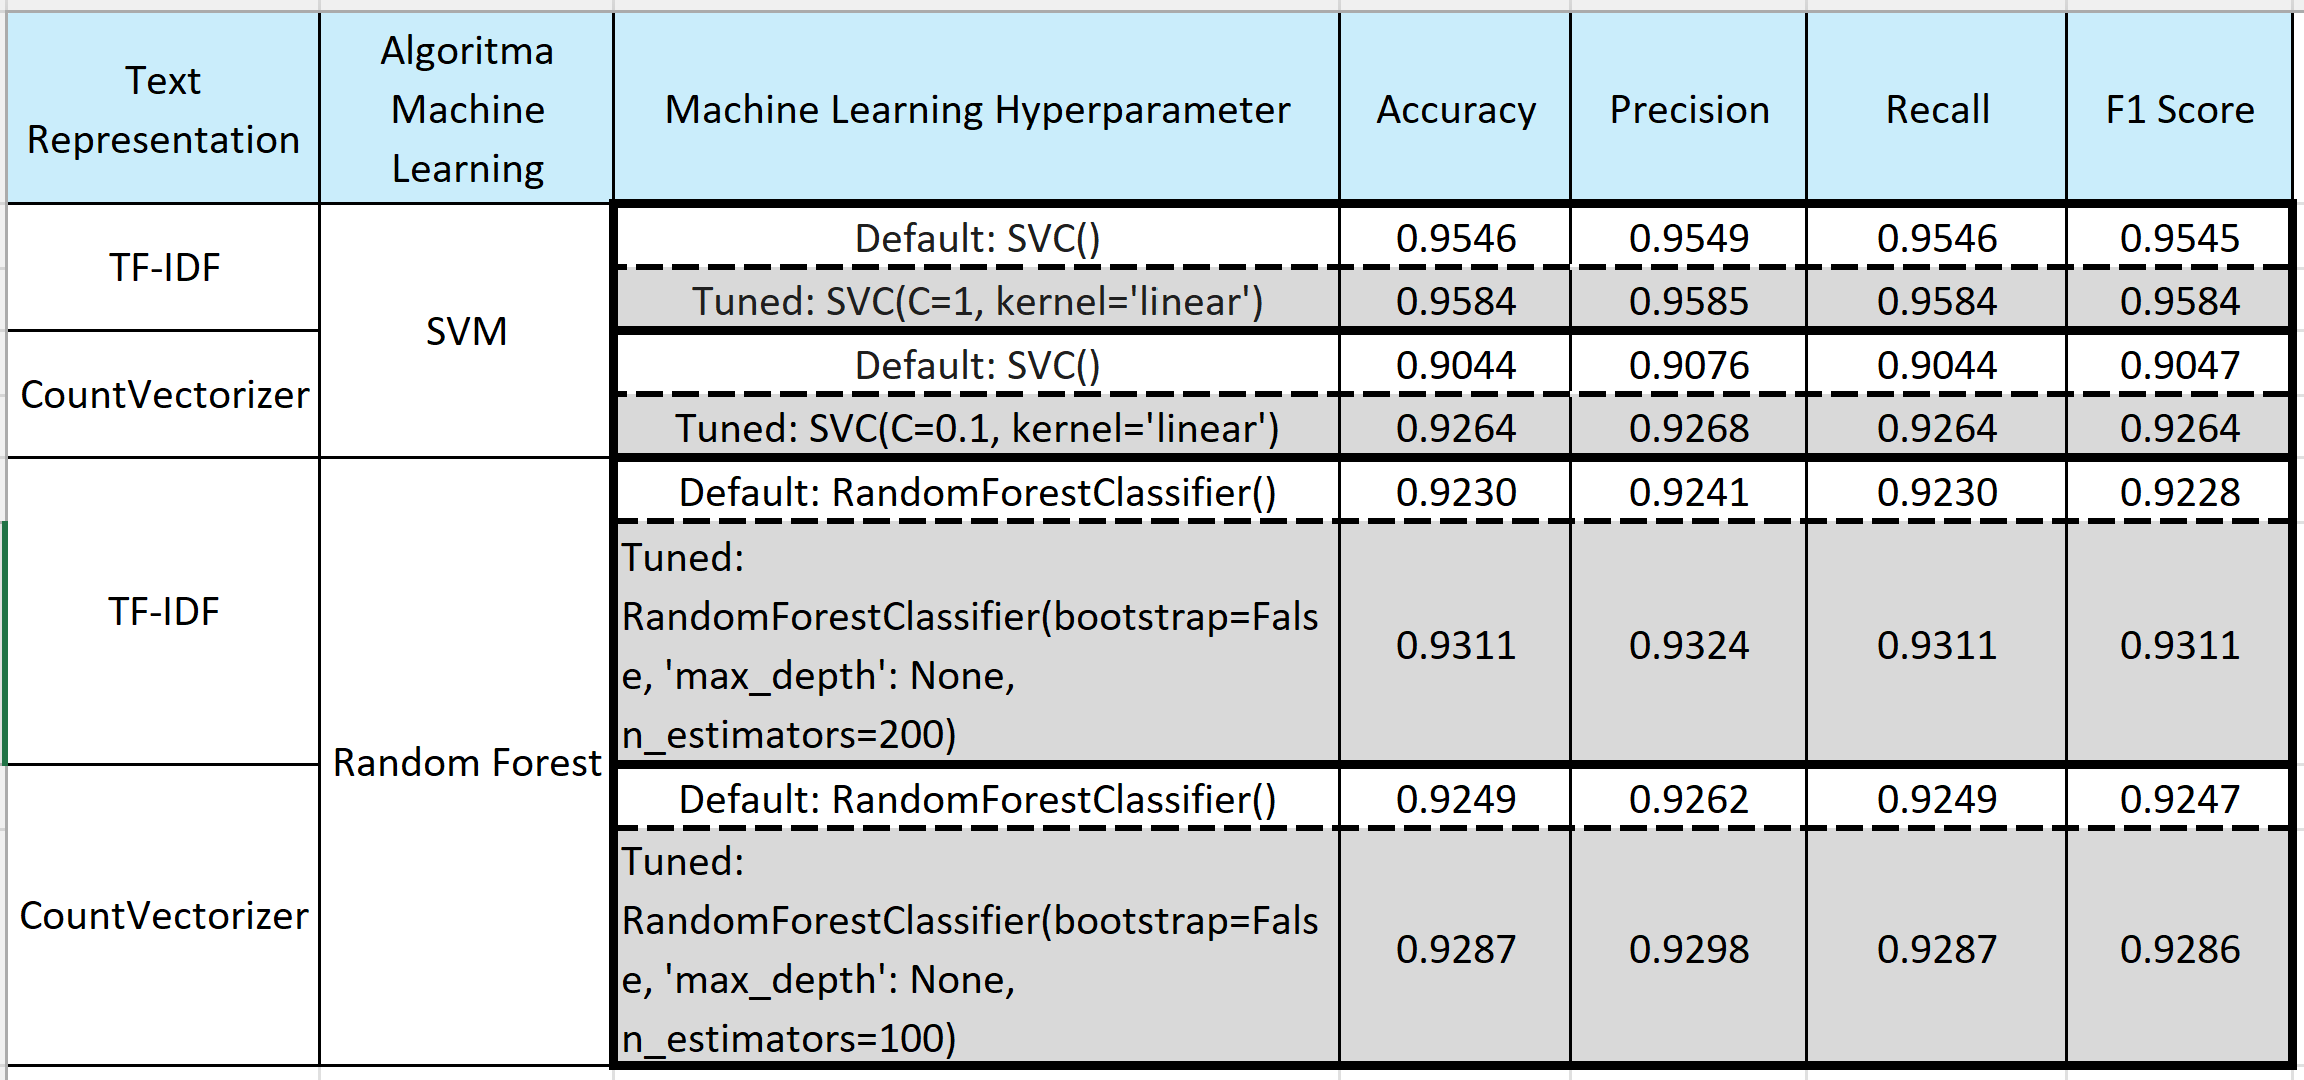

Dari hasil tabel di atas dapat disimpulkan bahwa metode terbaik untuk mengklasifikasikan produk adalah algoritma machine learning SVM dengan TF-IDF sebagai vectorizernya. Model ini mendapatkan akurasi sebesar 0.9536 sebelum di-tuned dan 0.9589 setelah di-tuned.

# LINK VIDEO [Video No 2](https://drive.google.com/file/d/1A-TQVpXCjl4n65bBlhJI9DiW1J4HXGNL/view?usp=sharing)